# Add Sensors to Positions Table and Hang it Into Global CRS

The notebook needs the input file `[dloc]/UB/positions.txt` which is generated by the `positions.ipynb` notebook.

In [1]:
# %matplotlib qt
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pyproj import Proj, transform
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import sys

In [2]:
plt.rc("font", size=12)
plt.rc("figure", figsize=(10, 7.5))

In [3]:
dloc = Path('../data/')

In [4]:
posloc = dloc / "UB/positions.txt"
if not posloc.exists():
    msg = f"Could not find {str(posloc)}. Run the 'positions.ipynb' notebook " \
          f"and re-start this kernel."
    print(msg, file=sys.stderr)
    raise ValueError(msg)

In [5]:
data = pd.read_csv(dloc / "UB/2015_eclipse_gps.csv", sep=',', index_col=0)
data.head()

LatNorth     LonEast       Ht
Name                                   
Base1  4708154.318  696016.525  406.836
tom    4708185.082  695998.203  402.850
PAD41  4708185.855  695990.997  402.930
PAD42  4708182.943  695992.143  402.976
PAD43  4708181.728  695989.489  402.941

In [6]:
data.index

Index(['Base1', 'tom', 'PAD41', 'PAD42', 'PAD43', 'PAD44', 'PAD31', 'PAD32',
       'PAD33', 'PAD34', 'PAD21', 'PAD22', 'PAD23', 'PAD24', 'PAD11', 'PAD12',
       'PAD13', 'PAD14', 'WALL1', 'WALL2', 'WALL3', 'WALL4', 'BLD1', 'BLD2',
       'BLD3', 'BLD4', 'WELL', 'INGOPAD11', 'INGOPAD12', 'INGOPAD13',
       'INGOPAD14', 'INGOPAD21', 'INGOPAD22', 'INGOPAD23', 'INGOPAD24', 'ws1',
       'pole', 'ROOF1', 'ROOF2', 'ROOF3', 'ROOF4', 'ROOFWEATHER', 'BRIDGE1',
       'BRIDGE2', 'BRIDGE3', 'BRIDGE4'],
      dtype='object', name='Name')

In [7]:
sel = data.loc[['ROOF1', 'ROOF2', 'ROOF3', 'ROOF4',
                'BLD1', 'BLD2', 'BLD3', 'BLD4']]
sel

LatNorth     LonEast       Ht
Name                                   
ROOF1  4708129.635  695993.189  408.162
ROOF2  4708117.725  695999.962  408.216
ROOF3  4708111.120  695988.366  408.223
ROOF4  4708123.038  695981.584  408.182
BLD1   4708130.396  695993.329  404.622
BLD2   4708118.531  696001.311  404.651
BLD3   4708110.336  695987.005  404.686
BLD4   4708123.044  695981.427  404.687

In [8]:
sel.loc['ROOF1', 'Ht'] - sel.loc['BLD1', 'Ht']

3.5399999999999636

## Reference system

In [9]:
crs = ccrs.UTM(zone=17, southern_hemisphere=False)

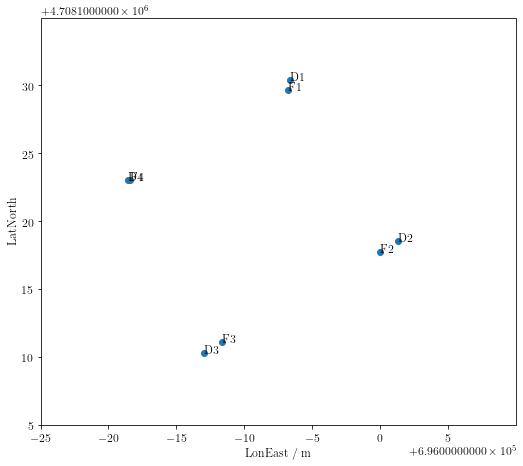

In [10]:
fig, ax = plt.subplots(subplot_kw=dict(projection=crs))
lnrng = (695975, 696010)
ltrng = (4708105, 4708135)
ax.set_xlim(*lnrng)
ax.set_ylim(*ltrng)
ax.set_xticks(np.arange(start=lnrng[0], stop=lnrng[1], step=5), crs=crs)
ax.set_yticks(np.arange(start=ltrng[0], stop=ltrng[1], step=5), crs=crs)
ax.set_xlabel('LonEast / m')
ax.set_ylabel('LatNorth')

ax.scatter(sel.LonEast, sel.LatNorth)
for name, (lat, lon, ht) in sel.iterrows():
    ax.annotate(name[-2:], (lon, lat))

# fig

In [11]:
d = np.sqrt(np.sum((
    sel.loc['ROOF4', ['LatNorth', 'LonEast']]
    - sel.loc['ROOF1', ['LatNorth', 'LonEast']]) ** 2))
d

13.349023709637063

In [12]:
pos = pd.read_csv(dloc / 'UB/positions.txt', sep='\t', index_col=0)
pos.head()

label  h_off       r         ϕ        θ   x_raw   y_raw  z_raw  \
point                                                                         
5           ref1-1  0.000  26.091  266.0937  87.4541  -1.776  26.005  1.159   
6      pad1, pipe1  1.915  36.530   23.5036  91.5113  33.488 -14.563 -0.963   
7      pad1, pipe2  1.935  36.394   24.4506  91.5016  33.119 -15.059 -0.954   
8      pad1, pipe3  1.925  36.246   25.4001  91.4915  32.731 -15.542 -0.943   
9      pad2, pipe1  1.935  35.895   29.1611  91.4908  31.335 -17.485 -0.934   

            x       y      z  
point                         
5      -0.000   0.000  2.764  
6      15.481  51.474 -1.273  
7      16.096  51.427 -1.284  
8      16.712  51.357 -1.263  
9      19.100  51.213 -1.264

In [13]:
pos.loc[pos.label.str.contains('ref')]

label  h_off       r         ϕ        θ  x_raw   y_raw  z_raw       x  \
point                                                                           
5      ref1-1    0.0  26.091  266.0937  87.4541 -1.776  26.005  1.159  -0.000   
60     ref1-2    0.0  26.080  263.3250  87.4401 -3.028  25.877  1.165  -0.000   
80     ref1-3    0.0  26.079  263.2653  87.4408 -3.055  25.873  1.164   0.017   
95     ref1-4    0.0  26.087  263.2810  87.4347 -3.049  25.882  1.168   0.006   
121    ref2-2    0.0  17.221  236.0218  86.3448 -9.605  14.251  1.098  13.357   

           y      z  
point                
5      0.000  2.764  
60     0.000  2.770  
80    -0.021  2.769  
95    -0.020  2.773  
121    0.000  2.703

In [14]:
sel

LatNorth     LonEast       Ht
Name                                   
ROOF1  4708129.635  695993.189  408.162
ROOF2  4708117.725  695999.962  408.216
ROOF3  4708111.120  695988.366  408.223
ROOF4  4708123.038  695981.584  408.182
BLD1   4708130.396  695993.329  404.622
BLD2   4708118.531  696001.311  404.651
BLD3   4708110.336  695987.005  404.686
BLD4   4708123.044  695981.427  404.687

In [15]:
zprime = sel.loc[['BLD1', 'BLD2', 'BLD3', 'BLD4'], 'Ht'].mean()
zprime

404.66150000000005

In [16]:
xprime, yprime = sel.loc['ROOF1', ['LonEast', 'LatNorth']]
xprime, yprime

(695993.189, 4708129.635)

In [17]:
ϕ = np.arctan(yprime / xprime)
ϕ

1.4240312997168083

In [18]:
ϕ * 180 / np.pi

81.59098336830229

In [19]:
bn = sel.loc['ROOF1'] - sel.loc['ROOF4']
bn

LatNorth     6.597
LonEast     11.605
Ht          -0.020
dtype: float64

In [20]:
ϕ = np.arctan(bn.LatNorth / bn.LonEast)
ϕ * 180 / np.pi

29.61657917052691

In [21]:
base2 = np.asarray(pos.loc[121, ['x', 'y']].values, dtype=float)
base2

array([13.357,  0.   ])

In [22]:
np.arccos(bn.LonEast / base2[0]) * 180 / np.pi

29.676712144160135

In [23]:
np.arcsin(bn.LatNorth / base2[0]) * 180 / np.pi

29.59713120786303

In [24]:
rot = np.array([
    [np.cos(ϕ), -np.sin(ϕ)],
    [np.sin(ϕ), np.cos(ϕ)]
])
rot_inv = np.array([
    [np.cos(-ϕ), -np.sin(-ϕ)],
    [np.sin(-ϕ), np.cos(-ϕ)]
])

In [25]:
sel.loc['ROOF4', ['LonEast', 'LatNorth']].values

array([ 695981.584, 4708123.038])

In [26]:
bprime = np.asarray(sel.loc['ROOF4', ['LonEast', 'LatNorth']].values, dtype=float)
bprime

array([ 695981.584, 4708123.038])

In [27]:
pos.loc[121]

label      ref2-2
h_off         0.0
r          17.221
ϕ        236.0218
θ         86.3448
x_raw      -9.605
y_raw      14.251
z_raw       1.098
x          13.357
y             0.0
z           2.703
Name: 121, dtype: object

In [28]:
np.dot(rot, base2)

array([11.6119342 ,  6.60094183])

In [29]:
test = np.dot(rot, base2) + bprime
test

array([ 695993.1959342 , 4708129.63894183])

In [30]:
sel

LatNorth     LonEast       Ht
Name                                   
ROOF1  4708129.635  695993.189  408.162
ROOF2  4708117.725  695999.962  408.216
ROOF3  4708111.120  695988.366  408.223
ROOF4  4708123.038  695981.584  408.182
BLD1   4708130.396  695993.329  404.622
BLD2   4708118.531  696001.311  404.651
BLD3   4708110.336  695987.005  404.686
BLD4   4708123.044  695981.427  404.687

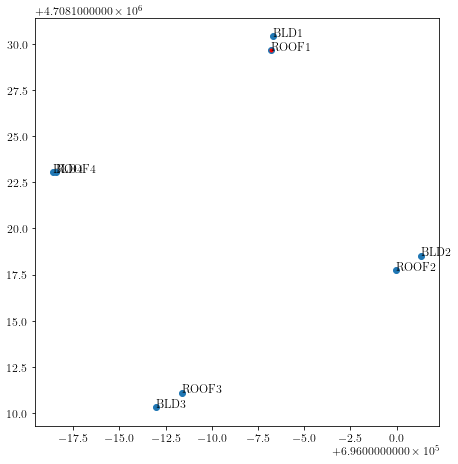

In [31]:
fig, ax = plt.subplots()

ax.set_aspect(1)
ax.scatter(sel.LonEast.values, sel.LatNorth.values)
for name, (latn, lone, h) in sel.iterrows():
    ax.annotate(name, (lone, latn))

ax.plot(test[0], test[1], 'r.')
# fig

## UTM projection

In [32]:
prj2 = Proj(
    "+proj=utm +zone=17 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs")

In [33]:
prj2(bprime[0], bprime[1], inverse=True)

(-78.61484925102599, 42.50065920831834)

In [34]:
prj = Proj(
    "+proj=utm +zone=17 +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

In [35]:
prj(bprime[0], bprime[1], inverse=True)

(-78.61484925104816, 42.50065920820436)

In [36]:
prj(sel.loc['ROOF1', ['LonEast', 'LatNorth']].values[0],
    sel.loc['ROOF1', ['LonEast', 'LatNorth']].values[1], inverse=True)

(-78.61470587636757, 42.50071562980001)

In [37]:
prj(-78.6147, 42.5010, inverse=False) - bprime #- 

array([11.19917097, 38.18908122])

In [38]:
prj2(-78.6147, 42.5010, inverse=False) - bprime #- 

array([11.1991695 , 38.18906851])

In [39]:
pos.index

Int64Index([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
            ...
            112, 113, 114, 115, 116, 117, 118, 119, 120, 121],
           dtype='int64', name='point', length=116)

In [40]:
a = pd.DataFrame([0, 1, 4, 9, 16], columns=['a'])
b = pd.DataFrame([0, 1, 8, 27, 64], columns=['a'])

In [41]:
pos.columns

Index(['label', 'h_off', 'r', 'ϕ', 'θ', 'x_raw', 'y_raw', 'z_raw', 'x', 'y',
       'z'],
      dtype='object')

In [42]:
pos['latn_m'] = np.nan
pos['lone_m'] = np.nan
pos['ht'] = np.nan
pos['latn_deg'] = np.nan
pos['lone_deg'] = np.nan

In [43]:
for name, row in pos.iterrows():
    pos.loc[name, ['lone_m', 'latn_m']] = np.dot(rot, row[['x', 'y']]) + bprime
    pos.loc[name, ['ht']] = row['z'] + zprime

In [44]:
lnedg, ltndg = prj(pos['lone_m'].values, pos['latn_m'].values, inverse=True)

In [45]:
pos['latn_deg'] = ltndg
pos['lone_deg'] = lnedg

pos.loc[[94, 108], ['lone_deg', 'latn_deg']] = np.nan  # set invalid values to nan

In [46]:
lone_or, latn_or = pos.loc[5, ['lone_m', 'latn_m']]

## UCSB sensor coordinates

In [47]:
newpos = pd.DataFrame(index=pd.RangeIndex(122, 122 + 16), columns=pos.columns)
seis = [f'NYS0{i}' for i in range(1, 8)]
inf = [f'NYI1{i}' for i in range(1, 4)] + \
      [f'NYI2{i}' for i in range(1, 4)] + \
      [f'NYI3{i}' for i in range(1, 4)]
newpos.loc[:, 'label'] = seis + inf
newpos.loc[:, 'latn_deg'] = [
    # seismic stations
    -78.6147, -78.6144, -78.6141, -78.6138, -78.6136, -78.6133, -78.6130,
    # infrasound
    -78.6147, -78.6147, -78.6152,
    -78.6144, -78.6141, -78.6138,
    -78.6136, -78.6133, -78.6130
]
newpos['lone_deg'] = [
    # seismic stations
    42.5010, 42.5005, 42.5001, 42.4997, 42.4993, 42.4989, 42.4986,
    # infrasound
    42.5013, 42.5010, 42.5010,
    42.5005, 42.5001, 42.4997,
    42.4993, 42.4989, 42.4986
]
newpos['ht'] = [
    # seismic stations
    403.8817, 401.6241, 402.8925, 407.5007, 406.7631, 405.2384, 402.9271,
    # infrasound
    403.1790, 403.8817, 397.4166,
    401.6241, 402.8925, 407.5007,
    406.7631, 405.2384, 402.9271
]
# get longitude, lattitude in meters
newpos.loc[:, ['lone_m', 'latn_m']] = np.vstack(
    prj2(newpos['latn_deg'].values, newpos['lone_deg'].values, inverse=False)).T

# transform into local coordinate system
for line, row in newpos.iterrows():
    newpos.loc[line, ['x', 'y']] = np.dot(rot_inv,
                                          row[['lone_m', 'latn_m']] - bprime)
    newpos.loc[line, 'z'] = row['ht'] - zprime

newpos

label h_off    r    ϕ    θ x_raw y_raw z_raw          x           y  \
122  NYS01   NaN  NaN  NaN  NaN   NaN   NaN   NaN  28.608807   27.665186   
123  NYS02   NaN  NaN  NaN  NaN   NaN   NaN   NaN  24.301585  -32.956018   
124  NYS03   NaN  NaN  NaN  NaN   NaN   NaN   NaN  25.210863   -83.76895   
125  NYS04   NaN  NaN  NaN  NaN   NaN   NaN   NaN  26.120449 -134.581957   
126  NYS05   NaN  NaN  NaN  NaN   NaN   NaN   NaN   19.77225 -181.535218   
127  NYS06   NaN  NaN  NaN  NaN   NaN   NaN   NaN  20.682395 -232.348372   
128  NYS07   NaN  NaN  NaN  NaN   NaN   NaN   NaN  26.808858 -273.353153   
129  NYI11   NaN  NaN  NaN  NaN   NaN   NaN   NaN  44.257375   57.090228   
130  NYI12   NaN  NaN  NaN  NaN   NaN   NaN   NaN  28.608807   27.665186   
131  NYI13   NaN  NaN  NaN  NaN   NaN   NaN   NaN  -7.680367   46.964317   
132  NYI21   NaN  NaN  NaN  NaN   NaN   NaN   NaN  24.301585  -32.956018   
133  NYI22   NaN  NaN  NaN  NaN   NaN   NaN   NaN  25.210863   -83.76895   
134  NYI23   NaN  NaN  NaN  NaN   NaN   NaN   NaN  26.120449 -134.581957   
135  NYI31   NaN  NaN  NaN  NaN   NaN   NaN   NaN   19.77225 -181.535218   
136  NYI32   NaN  NaN  NaN  NaN   NaN   NaN   NaN  20.682395 -232.348372   
137  NYI33   NaN  NaN  NaN  NaN   NaN   NaN   NaN  26.808858 -273.353153   

          z        latn_m         lone_m        ht  latn_deg  lone_deg  
122 -0.7798  4.708161e+06  695992.783169  403.8817  -78.6147   42.5010  
123 -3.0374  4.708106e+06  696018.997279  401.6241  -78.6144   42.5005  
124  -1.769  4.708063e+06  696044.899179  402.8925  -78.6141   42.5001  
125  2.8392  4.708019e+06  696070.801385  407.5007  -78.6138   42.4997  
126  2.1016  4.707975e+06  696088.486559  406.7631  -78.6136   42.4993  
127  0.5769  4.707931e+06  696114.389323  405.2384  -78.6133   42.4989  
128 -1.7344  4.707899e+06  696139.979669  402.9271  -78.6130   42.4986  
129 -1.4825  4.708195e+06  695991.845620  403.1790  -78.6147   42.5013  
130 -0.7798  4.708161e+06  695992.783169  403.8817  -78.6147   42.5010  
131 -7.2449  4.708160e+06  695951.697601  397.4166  -78.6152   42.5010  
132 -3.0374  4.708106e+06  696018.997279  401.6241  -78.6144   42.5005  
133  -1.769  4.708063e+06  696044.899179  402.8925  -78.6141   42.5001  
134  2.8392  4.708019e+06  696070.801385  407.5007  -78.6138   42.4997  
135  2.1016  4.707975e+06  696088.486559  406.7631  -78.6136   42.4993  
136  0.5769  4.707931e+06  696114.389323  405.2384  -78.6133   42.4989  
137 -1.7344  4.707899e+06  696139.979669  402.9271  -78.6130   42.4986

Append to `pos`, if necessary

In [48]:
if len(pos) < 120:
    pos = pd.concat([pos, newpos], ignore_index=False)

## MTU sensor coordinates

In [49]:
mtu = pd.read_csv(dloc / "MTU_seis_infr/compact/MTU_locs.csv")
mtu.head()

name    lon_deg    lat_deg
0  geophone -78.614787  42.501078
1       gp1 -78.614787  42.501078
2       gp2 -78.614773  42.501057
3       gp3 -78.614759  42.501035
4       gp4 -78.614744  42.501015

In [50]:
mtupos = pd.DataFrame(index=pd.RangeIndex(138, 138 + len(mtu)), columns=pos.columns)

mtupos['label'] = mtu['name'].values
mtupos['latn_deg'] = mtu['lat_deg'].values
mtupos['lone_deg'] = mtu['lon_deg'].values

The `z`-values were not available, so they are estimated here from near-by other points

In [51]:
mtupos[['z', 'ht']] = np.nan
mtupos.loc[138:143, 'z'] = -1.28                          # gp1-5
mtupos.loc[144:148, 'z'] = [-1.25, -1., -.75, -.5, -.25]  # gp6-10
mtupos.loc[149:155, 'z'] = 0.                             # gp11-17
mtupos.loc[156:158, 'z'] = [.2, .4, .5]                   # gp18-20
mtupos.loc[159:161, 'z'] = [.75, 1., 1.]                  # gp19-21
mtupos.loc[162, 'z'] = -1.5                               # broadbands
mtupos.loc[163, 'z'] = -1.25                              # acoustic

mtupos['ht'] = mtupos.loc[:, 'z'].values + zprime

In [52]:
mtupos.head()

label h_off    r    ϕ    θ x_raw y_raw z_raw    x    y     z latn_m  \
138  geophone   NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN -1.28    NaN   
139       gp1   NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN -1.28    NaN   
140       gp2   NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN -1.28    NaN   
141       gp3   NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN -1.28    NaN   
142       gp4   NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN -1.28    NaN   

    lone_m        ht   latn_deg   lone_deg  
138    NaN  403.3815  42.501078 -78.614787  
139    NaN  403.3815  42.501078 -78.614787  
140    NaN  403.3815  42.501057 -78.614773  
141    NaN  403.3815  42.501035 -78.614759  
142    NaN  403.3815  42.501015 -78.614744

In [53]:
# get longitude, lattitude in meters
mtupos.loc[:, ['lone_m', 'latn_m']] = np.vstack(
    prj2(mtupos['lone_deg'].values, mtupos['latn_deg'].values, inverse=False)).T

# transform into local coordinate system
mtupos[['x', 'y']] = np.nan
for line, row in mtupos.iterrows():
    mtupos.loc[line, ['x', 'y']] = np.dot(rot_inv,
                                          row[['lone_m', 'latn_m']] - bprime)

In [54]:
mtupos.head()

label h_off    r    ϕ    θ x_raw y_raw z_raw          x          y  \
138  geophone   NaN  NaN  NaN  NaN   NaN   NaN   NaN  26.348397  38.654608   
139       gp1   NaN  NaN  NaN  NaN   NaN   NaN   NaN  26.348397  38.654608   
140       gp2   NaN  NaN  NaN  NaN   NaN   NaN   NaN  26.243016  36.042208   
141       gp3   NaN  NaN  NaN  NaN   NaN   NaN   NaN  26.135091  33.324425   
142       gp4   NaN  NaN  NaN  NaN   NaN   NaN   NaN  26.223879  30.875495   

        z        latn_m         lone_m        ht   latn_deg   lone_deg  
138 -1.28  4.708170e+06  695985.387176  403.3815  42.501078 -78.614787  
139 -1.28  4.708170e+06  695985.387176  403.3815  42.501078 -78.614787  
140 -1.28  4.708167e+06  695986.586595  403.3815  42.501057 -78.614773  
141 -1.28  4.708165e+06  695987.835880  403.3815  42.501035 -78.614759  
142 -1.28  4.708163e+06  695989.123314  403.3815  42.501015 -78.614744

Apped to `pos` if necessary

In [55]:
if len(pos) < 158:
    pos = pd.concat([pos, mtupos], ignore_index=False)

## Plot locations with line numbers

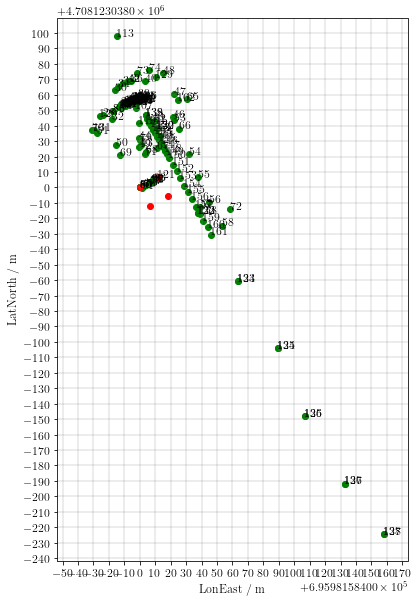

In [56]:
fig, ax = plt.subplots(subplot_kw=dict(projection=crs))

ax.set_xlim(695928, 696155)
ax.set_ylim(4707881, 4708233)
ax.set_xticks(np.arange(lone_or - 50, lone_or + 180, 10), crs=crs)
ax.set_yticks(np.arange(latn_or - 240, latn_or + 110, 10), crs=crs)
ax.scatter(pos['lone_m'], pos['latn_m'], color='g')
ax.grid(lw=.3, color='gray')
selpts = ['ROOF1', 'ROOF2', 'ROOF3', 'ROOF4']
ax.scatter(sel.loc[selpts, 'LonEast'], sel.loc[selpts, 'LatNorth'], color='r')
ax.ticklabel_format(axis='y', style='plain', useOffset=latn_or)
ax.ticklabel_format(axis='x', style='plain', useOffset=lone_or)
for i, row in pos.iterrows():
    ax.annotate(str(i), (row['lone_m'], row['latn_m']))

ax.set_xlabel(r'LonEast / m')
ax.set_ylabel(r'LatNorth / m')

fig.set_size_inches(6.5, 10)
# fig

In [57]:
import fiona
from shapely.geometry import Point
from fiona import collection

from shapely.geometry import mapping
from shapely.geometry import Polygon, LinearRing
from shapely.geometry import LineString

In [58]:
sel

LatNorth     LonEast       Ht
Name                                   
ROOF1  4708129.635  695993.189  408.162
ROOF2  4708117.725  695999.962  408.216
ROOF3  4708111.120  695988.366  408.223
ROOF4  4708123.038  695981.584  408.182
BLD1   4708130.396  695993.329  404.622
BLD2   4708118.531  696001.311  404.651
BLD3   4708110.336  695987.005  404.686
BLD4   4708123.044  695981.427  404.687

In [59]:
lone_deg, latn_deg = prj(sel['LonEast'].values, sel['LatNorth'].values,
                         inverse=True)

In [60]:
sel.loc[selpts, ['LatNorth', 'LonEast']].values

array([[4708129.635,  695993.189],
       [4708117.725,  695999.962],
       [4708111.12 ,  695988.366],
       [4708123.038,  695981.584]])

In [61]:
locs = [
    (ltd, lnd)
    for ltd, lnd in pos.loc[122:128, ['latn_deg', 'lone_deg']].values
]
locs

[(-78.6147, 42.501),
 (-78.6144, 42.5005),
 (-78.6141, 42.5001),
 (-78.6138, 42.4997),
 (-78.6136, 42.4993),
 (-78.6133, 42.4989),
 (-78.613, 42.4986)]

In [62]:
sel.loc[selpts, ['LonEast', 'LatNorth']].values

array([[ 695993.189, 4708129.635],
       [ 695999.962, 4708117.725],
       [ 695988.366, 4708111.12 ],
       [ 695981.584, 4708123.038]])

Building 18

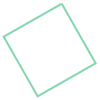

In [63]:
b18 = LinearRing(sel.loc[selpts, ['LonEast', 'LatNorth']].values)
b18

Small box around seismics line

In [64]:
spos = pos.loc[[122, 128], ['lone_m', 'latn_m']]
spos

lone_m        latn_m
122  695992.783169  4.708161e+06
128  696139.979669  4.707899e+06

In [65]:
spos

lone_m        latn_m
122  695992.783169  4.708161e+06
128  696139.979669  4.707899e+06

In [66]:
np.arctan2(spos.loc[122, 'latn_m'] - spos.loc[128, 'latn_m'],
           spos.loc[128, 'lone_m'] - spos.loc[122, 'lone_m']) * 180 / np.pi

60.72601884989363

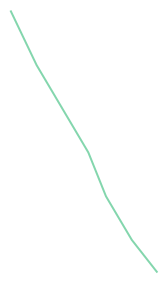

In [67]:
seisline = LineString(pos.loc[122:128, ['lone_m', 'latn_m']].values)
seisline

In [68]:
pos.loc[50:60]

label  h_off       r         ϕ        θ   x_raw   y_raw  z_raw       x  \
50  mic 30º  1.605  26.395  339.5257  91.4752  24.719    9.23  -0.68   0.042   
51   mic 0º  1.605   40.33  348.5424  92.3926  39.492   8.004 -1.684  -6.808   
52    byu-?  1.605  19.474   58.3416  93.5849  10.201 -16.544 -1.218  29.586   
53      gi1  1.605  22.665     91.47    93.31   -0.58  -22.62 -1.309  40.479   
54      gi2  1.605  21.278  157.5845  90.1608  -19.67  -8.114  -0.06  38.403   
55      gi3  1.605  32.039  184.1604  90.0427 -31.955   2.324 -0.024  36.134   
56      gi4  1.605  48.014  196.1535  89.4006 -46.116  13.357  0.502  34.364   
57      80m  1.605  46.091  203.5446  89.3949 -42.252  18.411  0.487  28.028   
58      daq  1.605  64.589  200.5141  88.1914 -60.463  22.623  2.038  34.187   
60   ref1-2    0.0   26.08   263.325  87.4401  -3.028  25.877  1.165    -0.0   

         y      z        latn_m         lone_m        ht   latn_deg   lone_deg  
50  31.359  -0.68  4.708150e+06  695966.123101  403.9815  42.500909 -78.615028  
51  44.505 -1.684  4.708158e+06  695953.671373  402.9775  42.500984 -78.615177  
52   32.84 -1.218  4.708166e+06  695991.075335  403.4435  42.501045 -78.614719  
53  26.967 -1.309  4.708166e+06  696003.447584  403.3525  42.501045 -78.614569  
54   3.081  -0.06  4.708145e+06  696013.447114  404.6015  42.500846 -78.614454  
55 -12.879 -0.024  4.708130e+06  696019.361881  404.6375  42.500710 -78.614388  
56 -30.743  0.502  4.708113e+06  696026.651400  405.1635  42.500560 -78.614305  
57 -30.173  0.487  4.708111e+06  696020.861496  405.1485  42.500538 -78.614376  
58 -47.821  2.038  4.708098e+06  696034.937360  406.6995  42.500424 -78.614209  
60     0.0   2.77  4.708123e+06  695981.584000  407.4315  42.500659 -78.614849

In [69]:
np.sqrt(
    np.sum(
        (pos.loc[125, ['x', 'y']].values
         - pos.loc[126, ['x', 'y']].values) ** 2)
)

47.3804638933268

In [70]:
fourkidx = list(range(70, 64, -1))
fourkidx

[70, 69, 68, 67, 66, 65]

In [71]:
ax.get_xlim(), ax.get_ylim()

((695928.0, 696155.0), (4707881.0, 4708233.0))

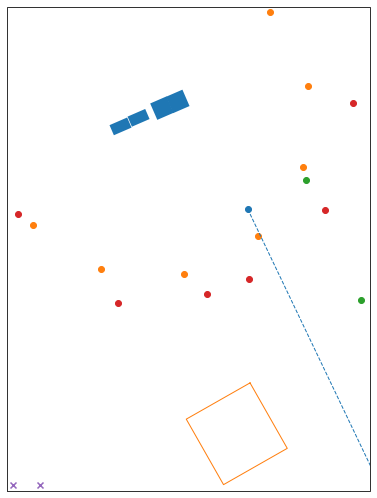

In [72]:
fig, ax = plt.subplots(subplot_kw=dict(projection=crs))
ax.set_xlim(695949, 696015)
ax.set_ylim(4708110, 4708198)

x, y = seisline.xy
ax.plot(x, y, lw=1, ls='dashed')
ax.scatter(x, y, )

x, y = b18.xy
ax.plot(x, y, lw=1)
# ax.scatter(x, y, )

pad1 = plt.Rectangle(pos.loc[7, ['lone_m', 'latn_m']].values - [1.75, 1.],
                     width=3.5, height=2)
pad2 = plt.Rectangle(pos.loc[10, ['lone_m', 'latn_m']].values - [1.75, 1.],
                     width=3.5, height=2.)
pad3 = plt.Rectangle(pos.loc[13:15, ['lone_m', 'latn_m']].values.sum(axis=0) / 3 - [.625, .625],
                     width=3.25, height=3.25)
pad4 = plt.Rectangle(pos.loc[16:18, ['lone_m', 'latn_m']].values.sum(axis=0) / 3 - [.625, .625],
                     width=3.25, height=3.25)
α = np.arctan((pad4.xy[1] - pad1.xy[1]) \
              / (pad4.xy[0] - pad1.xy[0])) * 180 / np.pi
for pad in [pad1, pad2, pad3, pad4]:
    pad.angle = α + 3
    ax.add_artist(pad)

micidx = [51, 50, 49, 45, 46, 47, 48]
miccoords = pos.loc[micidx, ['lone_m', 'latn_m']].values
ax.scatter(miccoords[:, 0], miccoords[:, 1])

miclineidx = [53, 54, 55, 56]
miclineloc = pos.loc[miclineidx, ['lone_m', 'latn_m']].values
ax.scatter(miclineloc[:, 0], miclineloc[:, 1])

fourkidx = list(range(70, 64, -1))
fourkcoords = pos.loc[fourkidx, ['lone_m', 'latn_m']].values
ax.scatter(fourkcoords[:, 0], fourkcoords[:, 1])

xstart, ystart = ax.get_xlim()[0] + 1., ax.get_ylim()[0] + 1.
ax.scatter([xstart, xstart + 5.], 2 * [ystart], marker='x')

fig.set_size_inches(6.5, 10)
# fig

## Output

### Shapefile

In [73]:
schema = {'geometry': 'Point', 'properties': [('Name', 'str')]}

shpf = fiona.open(dloc / 'UB/blast-objects-utm.shp', mode='w',
                  driver='ESRI Shapefile', schema=schema,
                  crs={'proj': 'utm', 'zone': '17', 'datum': 'WGS84',
                       'ellps': 'WGS84', 'units': 'm', 'north': True,
                       'no_defs': True})
for idx, row in pos.iterrows():
    x, y, z = row[['lone_m', 'latn_m', 'ht']]
    if np.isnan(z):
        z = -1e5
    rw = {
        'properties': {'Name': row['label']},
        'geometry': {'type': 'Point', 'coordinates': (x, y, z)},
    }
    shpf.write(rw)
shpf.close()

### CSV

In [74]:
h = open(dloc / 'UB/positions.csv', mode='w')

sep = "\t"
lines = [sep.join(["point"] + list(pos.columns)) + '\n']
for row in pos.index:
    rw = pos.loc[row]
    rs = f'{row}\t"{rw.label}"\t{rw.h_off:.3f}\t' \
         f'{rw.r:.4f}\t{rw["ϕ"]:.4f}\t{rw["θ"]:.4f}\t'\
         f'{rw.x_raw:.3f}\t{rw.y_raw:.3f}\t{rw.z_raw:.3f}\t'\
         f'{rw.x:.3f}\t{rw.y:.3f}\t{rw.z:.3f}\t'\
         f'{rw.latn_m:.3f}\t{rw.lone_m:.3f}\t'\
         f'{rw.ht:.3f}\t{rw.latn_deg:.6f}\t{rw.lone_deg:.6f}\n'
    lines.append(rs)
h.writelines(lines)
h.close()

In [75]:
h = open(dloc / 'UB/lat-lon-ht.txt', mode='w')

sep = "\t"
lines = [sep.join(["point"] + list(pos.columns)) + '\n']
for row in pos.index:
    rw = pos.loc[row]
    rs = f'{row}\t"{rw.label}"\t{rw.latn_deg}\t{rw.lone_deg}\t{rw.ht}\n'
    lines.append(rs)
h.writelines(lines)
h.close()

In [76]:
pos.head()

label  h_off       r         ϕ        θ   x_raw   y_raw  z_raw  \
5       ref1-1    0.0  26.091  266.0937  87.4541  -1.776  26.005  1.159   
6  pad1, pipe1  1.915   36.53   23.5036  91.5113  33.488 -14.563 -0.963   
7  pad1, pipe2  1.935  36.394   24.4506  91.5016  33.119 -15.059 -0.954   
8  pad1, pipe3  1.925  36.246   25.4001  91.4915  32.731 -15.542 -0.943   
9  pad2, pipe1  1.935  35.895   29.1611  91.4908  31.335 -17.485 -0.934   

        x       y      z        latn_m         lone_m        ht   latn_deg  \
5    -0.0     0.0  2.764  4.708123e+06  695981.584000  407.4255  42.500659   
6  15.481  51.474 -1.273  4.708175e+06  695969.604324  403.3885  42.501134   
7  16.096  51.427 -1.284  4.708176e+06  695970.162203  403.3775  42.501136   
8  16.712  51.357 -1.263  4.708176e+06  695970.732317  403.3985  42.501138   
9    19.1  51.213 -1.264  4.708177e+06  695972.879494  403.3975  42.501147   

    lone_deg  
5 -78.614849  
6 -78.614977  
7 -78.614970  
8 -78.614963  
9 -78.614937

### Write to `asdf`